Uses:
Dummy variables - (dataset has nominal categorical values)

# **Import**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# **Read Dataset**

In [4]:
df = pd.read_csv("/content/carprices.csv")
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


# **Data Visualization**

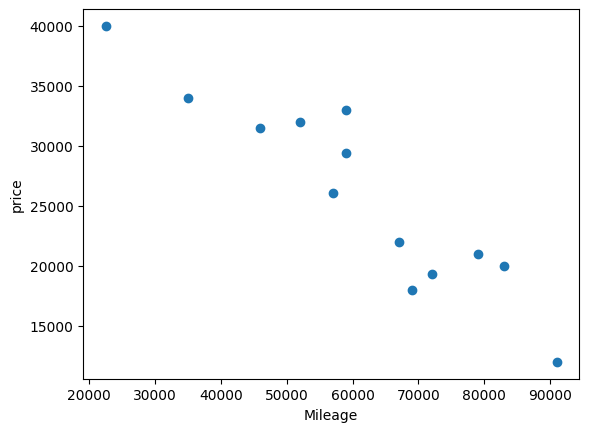

In [11]:
plt.xlabel("Mileage")
plt.ylabel("price")
plt.scatter(df['Mileage'], df['Sell Price($)'])


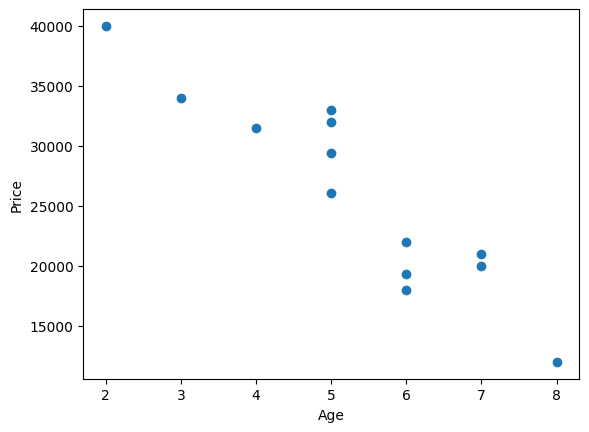

In [12]:
plt.xlabel('Age')
plt.ylabel('Price')
plt.scatter(df['Age(yrs)'], df['Sell Price($)'])

# **Data Cleaning**

In [18]:
print("Null values in [Car model]: ", df['Car Model'].isnull().sum())
print("Null values in [Mileage]: ", df['Mileage'].isnull().sum())
print("Null values in [Sell prices]: ", df['Sell Price($)'].isnull().sum())
print("Null values in [Age]: ", df['Age(yrs)'].isnull().sum())

Null values in [Car model]:  0
Null values in [Mileage]:  0
Null values in [Sell prices]:  0
Null values in [Age]:  0


# **Create Dummy Variables**

In [19]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [23]:
#merge the above dataframe with the original dataframe
merged = pd.concat([df,dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [27]:
#drop one of the dummy variable - to avoid dummy variable trap
final_df = merged.drop(['Car Model','Mercedez Benz C class'], axis='columns')
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


# **Linear Regression Model**

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
X=final_df.drop(['Sell Price($)'], axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [31]:
y = final_df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [32]:
model.fit(X,y)

LinearRegression()

# **Predict Prices**

In [34]:
# Predicitng the price of Mercedes car which is 4 years old with 45000 mileage
model.predict([[45000,4,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])